In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the bivariate distribution parameters
mu1 = torch.tensor([0, 0], dtype=torch.float32)
mu2 = torch.tensor([2, 2], dtype=torch.float32)
mu3 = torch.tensor([-2, 2], dtype=torch.float32)
sigma = 2

# Generate 10,000 samples from the given distribution
samples = torch.cat([
    torch.randn(3333, 2) * sigma + mu1,
    torch.randn(3333, 2) * sigma + mu2,
    torch.randn(3334, 2) * sigma + mu3
])


In [2]:
# Define the generator and discriminator networks
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

Epoch: 0, Discriminator Loss: 1.5945696830749512, Generator Loss: 0.8150308728218079
Epoch: 0, Discriminator Loss: 1.4865705966949463, Generator Loss: 0.7755271196365356
Epoch: 0, Discriminator Loss: 1.4704458713531494, Generator Loss: 0.7541746497154236
Epoch: 0, Discriminator Loss: 1.445002794265747, Generator Loss: 0.7292817831039429
Epoch: 0, Discriminator Loss: 1.4102466106414795, Generator Loss: 0.7034339904785156
Epoch: 0, Discriminator Loss: 1.3671067953109741, Generator Loss: 0.6876636147499084
Epoch: 0, Discriminator Loss: 1.4654598236083984, Generator Loss: 0.6756061911582947
Epoch: 0, Discriminator Loss: 1.3464179039001465, Generator Loss: 0.6643978357315063
Epoch: 0, Discriminator Loss: 1.2498464584350586, Generator Loss: 0.6698168516159058
Epoch: 0, Discriminator Loss: 1.1664384603500366, Generator Loss: 0.6814088821411133
Epoch: 0, Discriminator Loss: 1.0916132926940918, Generator Loss: 0.7000146508216858
Epoch: 0, Discriminator Loss: 1.0924746990203857, Generator Loss: 

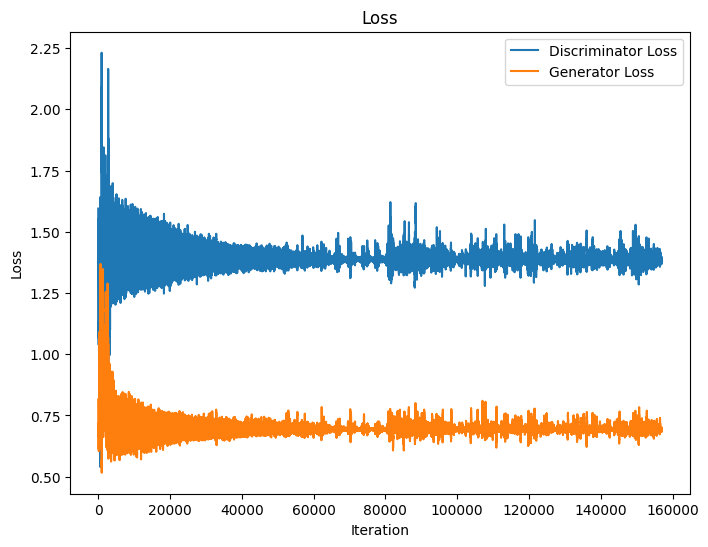

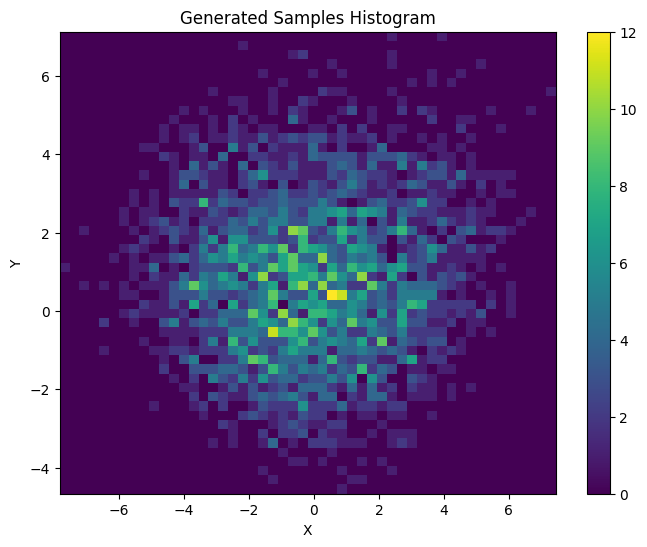

In [3]:
# Initialize generator, discriminator, and optimizers
input_dim = 10  # Adjust input dimensions as needed
output_dim = 2   # Adjust output dimensions to match data dimensions
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)
gen_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
dis_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
criterion = nn.BCELoss()

# Training loop
num_epochs = 1000
batch_size = 64

discriminator_loss = []
generator_loss = []

for epoch in range(num_epochs):
    for i in range(0, len(samples), batch_size):
        # Train discriminator
        dis_optimizer.zero_grad()
        real_data = samples[i:i+batch_size]
        real_labels = torch.ones(len(real_data), 1)
        fake_data = generator(torch.randn(len(real_data), input_dim))
        fake_labels = torch.zeros(len(fake_data), 1)

        dis_loss = criterion(discriminator(real_data), real_labels) + \
                   criterion(discriminator(fake_data.detach()), fake_labels)
        dis_loss.backward()
        dis_optimizer.step()

        # Train generator
        gen_optimizer.zero_grad()
        generated_data = generator(torch.randn(len(real_data), input_dim))
        gen_loss = criterion(discriminator(generated_data), real_labels)
        gen_loss.backward()
        gen_optimizer.step()

        # Save loss values for plotting
        discriminator_loss.append(dis_loss.item())
        generator_loss.append(gen_loss.item())

        # Print loss
        if i % (batch_size * 10) == 0:
            print(f"Epoch: {epoch}, Discriminator Loss: {dis_loss}, Generator Loss: {gen_loss}")

# Generate samples from the trained generator
num_generated_samples = 3000
generated_samples = generator(torch.randn(num_generated_samples, input_dim)).detach().numpy()

# Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(discriminator_loss, label='Discriminator Loss')
plt.plot(generator_loss, label='Generator Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')

# Plot histogram of generated samples
plt.figure(figsize=(8, 6))
plt.hist2d(generated_samples[:, 0], generated_samples[:, 1], bins=50, cmap='viridis')
plt.colorbar()
plt.title('Generated Samples Histogram')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Text(0, 0.5, 'Y')

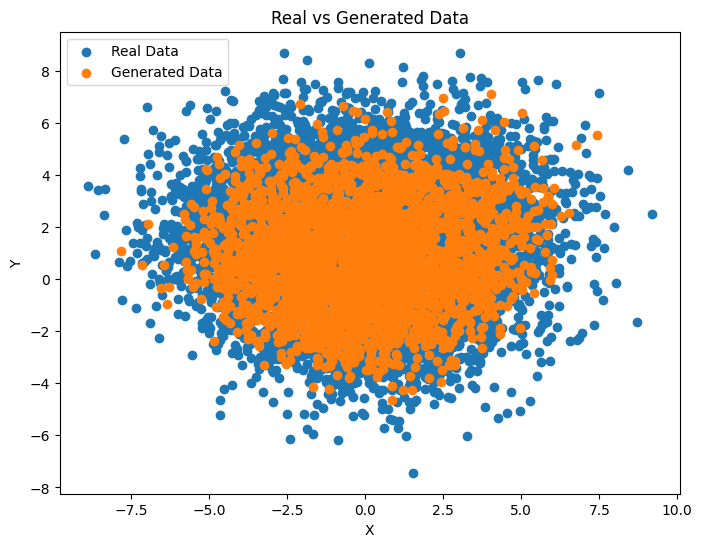

In [7]:
# Plot the samples and generated samples, in same graph, but different colors
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], label='Real Data')
plt.scatter(generated_samples[:, 0], generated_samples[:, 1], label='Generated Data')
plt.legend()
plt.title('Real vs Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
